# Image lookup

In [ ]:
import cv2
import matplotlib.pyplot as plt
import json

label_path = '/root/275.주요 화훼류 품질 데이터/01.데이터/Training/02.라벨링데이터/TL_01.장미_001.헤라_정상/P01_S01_H01_A_113_0_D01_C06_2209241613_220924_220924_S400011.json'
with open(label_path, 'r') as f:
    json_data = json.load(f)
json_data.keys()

In [ ]:
json_data['imagePath']

In [ ]:
json_data['Bounding']

In [ ]:
json_data['shapes']

In [ ]:
img_path = '/root/275.주요 화훼류 품질 데이터/01.데이터/Training/01.원천데이터/TS_01.장미_001.헤라_정상/P01_S01_H01_A_113_0_D01_C06_2209241613_220924_220924_S400011.jpg'
img = cv2.imread(img_path)


for item in json_data['shapes']:
    xy1, xy2 = item['points']
    x1, y1 = list(map(int, xy1))
    x2, y2 = list(map(int, xy2))
    #x2 += x1
    #y2 += y1

    img = cv2.rectangle(img, (x1, y1), (x2, y2), (255, 255, 255), 10)
    print(xy1, xy2)
    #break
plt.imshow(img)

# Prepare dataset

In [ ]:
import matplotlib.pyplot as plt
img_path = '/root/275.주요 화훼류 품질 데이터/01.데이터/Training/01.원천데이터/TS_01.장미_001.헤라_정상/P01_S01_H01_A_113_0_D01_C06_2209241613_220924_220924_S400011.jpg'
img = cv2.imread(img_path)
plt.imshow(img)

## Image Resize

In [1]:
import cv2
import numpy as np
def Image_Resize(img, size=256):
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, dsize=(size, size), interpolation=cv2.INTER_AREA)
    return img
'''
def Image_Resize(img, size=256):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = cv2.resize(img, dsize=(size, size), interpolation=cv2.INTER_AREA)

    height, width = img.shape
    max_edge = height if height > width else width

    pad_h = (max_edge - height) // 2
    pad_w = (max_edge - width) // 2 

    base = np.zeros((max_edge, max_edge), np.uint8)

    base[pad_h:pad_h+height, pad_w:pad_w+width] = img

    if pad_h == 0:
        base[:, :pad_w] = [[i]*pad_w for i in img[:, 0]]
        base[:, pad_w+width:-1] = [[i]*pad_w for i in img[:, width-1]]
    
    else:
        base[:pad_h, :] = [[i]*pad_h for i in img[0, :]]
        base[pad_h+height:-1, :] = [[i]*pad_h for i in img[height  -1, :]]

    base = cv2.resize(base, (size, size))

    return base
'''
#plt.imshow(Image_Resize(img))

'\ndef Image_Resize(img, size=256):\n    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)\n    #img = cv2.resize(img, dsize=(size, size), interpolation=cv2.INTER_AREA)\n\n    height, width = img.shape\n    max_edge = height if height > width else width\n\n    pad_h = (max_edge - height) // 2\n    pad_w = (max_edge - width) // 2 \n\n    base = np.zeros((max_edge, max_edge), np.uint8)\n\n    base[pad_h:pad_h+height, pad_w:pad_w+width] = img\n\n    if pad_h == 0:\n        base[:, :pad_w] = [[i]*pad_w for i in img[:, 0]]\n        base[:, pad_w+width:-1] = [[i]*pad_w for i in img[:, width-1]]\n    \n    else:\n        base[:pad_h, :] = [[i]*pad_h for i in img[0, :]]\n        base[pad_h+height:-1, :] = [[i]*pad_h for i in img[height  -1, :]]\n\n    base = cv2.resize(base, (size, size))\n\n    return base\n'

## Search all files

In [2]:
import pandas as pd
import cv2
import os

base_path = '/root/275.주요 화훼류 품질 데이터/01.데이터'
copy_path = '/root/dataset/midterm'
err_list = []

for file_type in os.listdir(base_path):
    if not os.path.isdir(os.path.join(base_path, file_type)):
        continue
    
    label = []
    label_img_name = []
    count = 0
    
    file_type_path = os.path.join(base_path, file_type, '01.원천데이터')
    copy_path_cur = os.path.join(copy_path, file_type)
    os.makedirs(copy_path_cur, exist_ok=True)

    for folder in os.listdir(file_type_path):
        folder_path = os.path.join(file_type_path, folder)
        print(folder, '시작!')
        
        for image in os.listdir(folder_path):
            try:
                image_path = os.path.join(folder_path, image)
                
                img = cv2.imread(image_path)
                img = Image_Resize(img, size=256)
                
                save_path = os.path.join(copy_path_cur, str(count)+'.jpg')
                cv2.imwrite(save_path, img)
                
                label.append(int(image[1:3])-1)
                label_img_name.append(str(count)+'.jpg')
                count += 1
                #break

            except:
                err_list.append(image)
                print(image)

    
    df = pd.DataFrame(label_img_name, columns=['image'])
    df['label'] = label

    df.to_csv(os.path.join(copy_path_cur, 'label.csv'), index=False)


TS_01.장미_001.헤라_정상 시작!
TS_01.장미_002.푸에고_정상 시작!
P01_S02_H01_A_112_0_D01_C03_2209261111_220924_220924_S000007.jpg
P01_S02_H01_A_112_0_D01_C03_2209261114_220924_220924_S000018.jpg
P01_S02_H01_A_112_0_D01_C03_2209261125_220924_220924_S000051.jpg
TS_01.장미_003.보보스_정상 시작!
P01_S03_H01_A_122_0_R03_C03_2210081348_221006_221007_S000001.jpg
P01_S03_H01_A_122_0_R03_C03_2210081351_221006_221007_S000020.jpg
P01_S03_H01_A_122_0_R03_C03_2210081352_221006_221007_S000026.jpg
TS_01.장미_004.자나_정상 시작!
P01_S04_H01_A_112_0_D02_C03_2211241550_221117_221118_S000531.jpg
P01_S04_H01_A_112_0_D02_C03_2211241551_221117_221118_S000534.jpg
P01_S04_H01_A_112_0_D02_C03_2211241554_221117_221118_S000560.jpg
TS_01.장미_005.햇살_정상 시작!
TS_02.국화_001.신마_정상 시작!
TS_02.국화_002.백선_정상 시작!


[ WARN:0@4458.293] global loadsave.cpp:248 findDecoder imread_('/root/275.주요 화훼류 품질 데이터/01.데이터/Training/01.원천데이터/TS_02.국화_002.백선_정상/P02_S02_H01_A_131_2_F02_C21_2210021210_220930_221001_S000495.jpg'): can't open/read file: check file path/integrity


P02_S02_H01_A_131_2_F02_C21_2210021210_220930_221001_S000495.jpg


[ WARN:0@4458.513] global loadsave.cpp:248 findDecoder imread_('/root/275.주요 화훼류 품질 데이터/01.데이터/Training/01.원천데이터/TS_02.국화_002.백선_정상/P02_S02_H01_A_131_2_F02_C21_2210021210_220930_221001_S001108.jpg'): can't open/read file: check file path/integrity


P02_S02_H01_A_131_2_F02_C21_2210021210_220930_221001_S001108.jpg


[ WARN:0@4458.807] global loadsave.cpp:248 findDecoder imread_('/root/275.주요 화훼류 품질 데이터/01.데이터/Training/01.원천데이터/TS_02.국화_002.백선_정상/P02_S02_H01_A_131_2_F02_C21_2210021212_220930_221001_S000508.jpg'): can't open/read file: check file path/integrity


P02_S02_H01_A_131_2_F02_C21_2210021212_220930_221001_S000508.jpg
TS_02.국화_003.포드_정상 시작!


[ WARN:0@4754.650] global loadsave.cpp:248 findDecoder imread_('/root/275.주요 화훼류 품질 데이터/01.데이터/Training/01.원천데이터/TS_02.국화_003.포드_정상/P02_S03_H01_A_132_0_R03_C07_2210222106_221021_221022_S000774.jpg'): can't open/read file: check file path/integrity


P02_S03_H01_A_132_0_R03_C07_2210222106_221021_221022_S000774.jpg


[ WARN:0@4755.038] global loadsave.cpp:248 findDecoder imread_('/root/275.주요 화훼류 품질 데이터/01.데이터/Training/01.원천데이터/TS_02.국화_003.포드_정상/P02_S03_H01_A_132_0_R03_C07_2210222115_221021_221022_S000803.jpg'): can't open/read file: check file path/integrity


P02_S03_H01_A_132_0_R03_C07_2210222115_221021_221022_S000803.jpg


[ WARN:0@4992.645] global loadsave.cpp:248 findDecoder imread_('/root/275.주요 화훼류 품질 데이터/01.데이터/Training/01.원천데이터/TS_02.국화_003.포드_정상/P02_S03_H01_B_111_0_R03_C09_2210231057_221021_221022_S000009.jpg'): can't open/read file: check file path/integrity


P02_S03_H01_B_111_0_R03_C09_2210231057_221021_221022_S000009.jpg


[ WARN:0@4993.339] global loadsave.cpp:248 findDecoder imread_('/root/275.주요 화훼류 품질 데이터/01.데이터/Training/01.원천데이터/TS_02.국화_003.포드_정상/P02_S03_H01_B_111_0_R03_C09_2210231100_221021_221022_S000030.jpg'): can't open/read file: check file path/integrity


P02_S03_H01_B_111_0_R03_C09_2210231100_221021_221022_S000030.jpg


[ WARN:0@4994.749] global loadsave.cpp:248 findDecoder imread_('/root/275.주요 화훼류 품질 데이터/01.데이터/Training/01.원천데이터/TS_02.국화_003.포드_정상/P02_S03_H01_B_111_0_R03_C09_2210231110_221021_221022_S000077.jpg'): can't open/read file: check file path/integrity


P02_S03_H01_B_111_0_R03_C09_2210231110_221021_221022_S000077.jpg


[ WARN:0@5045.495] global loadsave.cpp:248 findDecoder imread_('/root/275.주요 화훼류 품질 데이터/01.데이터/Training/01.원천데이터/TS_02.국화_003.포드_정상/P02_S03_H01_B_111_0_R03_C10_2210231647_221021_221022_S000373.jpg'): can't open/read file: check file path/integrity


P02_S03_H01_B_111_0_R03_C10_2210231647_221021_221022_S000373.jpg
TS_02.국화_004.금수_정상 시작!
TS_02.국화_005.백강_정상 시작!
TS_03.거베라_001.폼포니_정상 시작!
TS_03.거베라_002.피콜리니_정상 시작!
TS_03.거베라_003.스파이더_정상 시작!
TS_03.거베라_004.파스타_정상 시작!
TS_03.거베라_005.미니거베라_정상 시작!
TS_04.백합_001.시베리아_정상 시작!
TS_04.백합_003.우리타워_정상 시작!
TS_06.접목선인장_001.아홍_정상 시작!
TS_06.접목선인장_002.아황_정상 시작!
TS_06.접목선인장_003.아울_정상 시작!
P06_S03_H01_B_111_0_F11_C12_2211171541_221120_221121_S000112.jpg
P06_S03_H01_B_111_0_F11_C12_2211171546_221120_221121_S000127.jpg
P06_S03_H01_B_111_0_F11_C12_2211171549_221120_221121_S000140.jpg
P06_S03_H01_B_111_0_F11_C12_2211171550_221120_221121_S000144.jpg
P06_S03_H01_B_111_0_F11_C12_2211171550_221120_221121_S000148.jpg
P06_S03_H01_B_111_0_F11_C12_2211171551_221120_221121_S000151.jpg
P06_S03_H01_B_111_0_F11_C12_2211171552_221120_221121_S000152.jpg
P06_S03_H01_B_111_0_F11_C12_2211171552_221120_221121_S000154.jpg
P06_S03_H01_B_111_0_F11_C12_2211171552_221120_221121_S000155.jpg
P06_S03_H01_B_111_0_F11_C12_2211171554_221120_2

## Devide Train and Test

In [13]:
# 필요한 라이브러리들을 임포트합니다.
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import Sequence

class Dataloader(Sequence):

    def __init__(self, dataset_path, label_path):
        self.dataset_path = dataset_path 
        self.label_path = label_path
    
    def get_imagesets(self, path_list):
        basepath = self.dataset_path
        image_list = []

        for image in tqdm(path_list):
            image_path = os.path.join(basepath, image)
            image_list.append(plt.imread(image_path))

        return np.array(image_list)


    def get_datasets(self):
        df = pd.read_csv(self.label_path)
        
        X_train_path, x_test_path, Y_train, y_test = train_test_split(df['image'].iloc[:1000], df['label'].iloc[:1000], train_size=0.8, shuffle=True, stratify=df['label'])

        print('X_train data')
        X_train = self.get_imagesets(X_train_path)
        print('X_test data')
        x_test = self.get_imagesets(x_test_path)

        return (X_train, x_test, Y_train, y_test)


# 데이터를 로드합니다.
print('load data')
datasets = Dataloader('./dataset/midterm/Training', './dataset/midterm/Training/label.csv')
X_train, x_test, Y_train, y_test = datasets.get_datasets()

# 입력 데이터를 [0, 1] 범위로 정규화합니다.
X_train = X_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 레이블을 one-hot 인코딩합니다.
Y_train = to_categorical(Y_train, 10)
y_test = to_categorical(y_test, 10)

load data
X_train data


100%|██████████| 800/800 [00:01<00:00, 434.98it/s]


X_test data


100%|██████████| 200/200 [00:00<00:00, 442.46it/s]


In [3]:
import cv2

path = './dataset/midterm/Training/1.jpg'
img = cv2.imread(path)
type(img)

numpy.ndarray

Text(0.5, 1.0, '[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]')

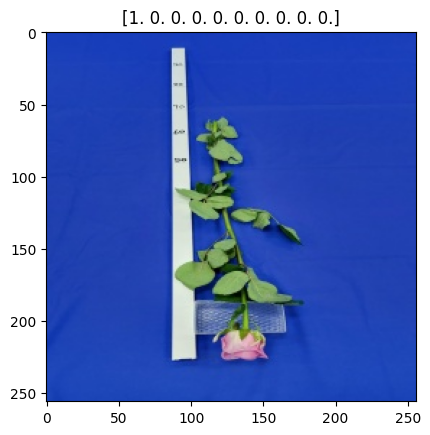

In [26]:
import matplotlib.pyplot as plt

img = X_train[100]
label = Y_train[100]
plt.imshow(img)
plt.title(label)
#plt.imshow()

# score.py

In [26]:
def  score_two_csv(pred_df, labels_df):
    score = 0
    labels = labels_df.set_index(['image'])

    pred_names = pred_df['image'].values
    for name, label in pred_df.values:
        score += 1 if labels.loc[name]['label'] == label else 0
    
    return score / len(labels_df)

In [28]:
import pandas as pd

pred = pd.read_csv('/root/dataset/midterm/Validation/label.csv')
score_two_csv(pred, pred)

1.0